In [1]:
import numpy as np
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
from scipy import special
import matplotlib.pyplot as plt
%matplotlib inline

py.tools.set_credentials_file(username='toboa', api_key='ZdyIfyp9N9aHvcmAxnca')

py.offline.init_notebook_mode(connected=True) 

In [29]:
import numpy as np
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
from scipy import special
import matplotlib.pyplot as plt
%matplotlib inline

py.tools.set_credentials_file(username='toboa', api_key='ZdyIfyp9N9aHvcmAxnca')

py.offline.init_notebook_mode(connected=True) 



#imports the fungi_data
fungi_data = pd.read_csv("march6_mushroom.csv",  delimiter = "\t")

## NOTE: Drops the columns of data that are not useful to us.
fungi_clean = fungi_data.drop(['datasetKey', 'kingdom', 'phylum', 'order','class', 'taxonRank', 
                               'infraspecificEpithet', 'species','rightsHolder', 'license', 'mediaType', 
                               'issue','institutionCode', 'collectionCode','catalogNumber', 'recordNumber',
                               'identifiedBy', 'dateIdentified', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
                               'basisOfRecord',  'elevationAccuracy', 'depth', 'depthAccuracy', 'coordinatePrecision',
                               'elevation', 'countryCode', 'locality', 'eventDate', 'taxonKey','speciesKey', 'recordedBy',
                               'publishingOrgKey', 'gbifID', 'occurrenceID', 'day'], 
                              axis = 1)
fungi_clean = fungi_clean.sort_values('year')

/Users/louis/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning:

Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.



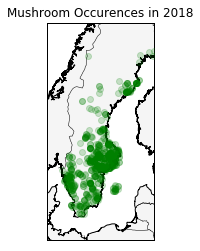

In [37]:
#sources : https://stackoverflow.com/questions/43757820/how-to-add-a-variable-to-python-plt-title
#https://stackoverflow.com/questions/44488167/plotting-lat-long-points-using-basemap
#https://anaconda.org/anaconda/basemap
#

for j in np.arange(2018,2019,1):
# display(fungi_clean.head())
    year_num = j
    # # the years with the most data are 1988 and 1993, with 233 and 244 data points reespectively
    data_year = fungi_clean.loc[fungi_clean['year'] == year_num,['decimalLatitude','decimalLongitude','month']]
    data_year = data_year.dropna(axis=0)
    #check to make sure there is no nulls.
    # print(data_year.isnull().sum())
    lat = data_year['decimalLatitude']
    lon = data_year['decimalLongitude']
    month = data_year['month']
    # read in data to use for plotted points
    lat = data_year['decimalLatitude'].values
    lon = data_year['decimalLongitude'].values

    # determine range to print based on min, max lat and lon of the data
    margin = 2 # buffer to add to the range
    lat_min = 53.548556999999995

    lat_max = 67.582554

    lon_min = 9.218907000000002

    lon_max = 23.578836

    # create map using BASEMAP
    m = Basemap(llcrnrlon=lon_min,
                llcrnrlat=lat_min,
                urcrnrlon=lon_max,
                urcrnrlat=lat_max,
                lat_0=(lat_max - lat_min)/2,
                lon_0=(lon_max-lon_min)/2,
                projection='merc',
                resolution = 'h',
                area_thresh=10000.,
                )
    m.drawcoastlines()
    m.drawcountries()

    m.drawmapboundary(fill_color='white')
    m.fillcontinents(color = 'whitesmoke',lake_color='azure')
    # convert lat and lon to map projection coordinates
    lons, lats = m(lon, lat)
    # plot points as red dots
    m.scatter(lons, lats, marker = 'o', color='g', zorder=5, alpha = .2,)
    plt.title("Mushroom Occurences in %i" % year_num)
    plt.savefig('%s.png' % (str(j)), dpi=300)
    plt.show()